In [24]:
import yfinance as yf
import pandas as pd 
import tensorflow as tf

import numpy as np
import sklearn 



In [25]:
#we want to improt in 10 crypto tickers and ditmreine the correlation and plot all of them 
cryptos = ["BNB-USD", "DOT-USD", "NEAR-USD", "XMR-USD", "MATIC-USD", "ADA-USD", "SOL-USD"]




In [26]:
# now we need to download the data for the cryptos 
cryptos_data = yf.download(cryptos, start = "2019-01-01", end ="2022-07-01" )

[*********************100%***********************]  7 of 7 completed


In [27]:
# lets viausalise the data first 
cryptos_data


Adj Close                                                       \
             ADA-USD     BNB-USD   DOT-USD MATIC-USD  NEAR-USD    SOL-USD   
Date                                                                        
2018-12-31  0.041063    6.164732       NaN       NaN       NaN        NaN   
2019-01-01  0.042547    6.075273       NaN       NaN       NaN        NaN   
2019-01-02  0.045258    6.188613       NaN       NaN       NaN        NaN   
2019-01-03  0.042682    5.903535       NaN       NaN       NaN        NaN   
2019-01-04  0.043812    6.065138       NaN       NaN       NaN        NaN   
...              ...         ...       ...       ...       ...        ...   
2022-06-26  0.489653  233.858749  7.835564  0.560724  3.783262  39.408089   
2022-06-27  0.485790  233.654022  7.744108  0.532732  3.734024  38.451252   
2022-06-28  0.469671  226.927338  7.310052  0.511107  3.414834  35.326439   
2022-06-29  0.465509  219.284470  7.009116  0.495232  3.413312  33.873901   
2022-06-30  0.458849  219.300095  7.039863  0.477371  3.332443  33.588417   

                           Close                        ...      Open  \
               XMR-USD   ADA-USD     BNB-USD   DOT-USD  ...  NEAR-USD   
Date                                                    ...             
2018-12-31   46.228168  0.041063    6.164732       NaN  ...       NaN   
2019-01-01   48.367496  0.042547    6.075273       NaN  ...       NaN   
2019-01-02   52.252449  0.045258    6.188613       NaN  ...       NaN   
2019-01-03   49.815357  0.042682    5.903535       NaN  ...       NaN   
2019-01-04   50.630875  0.043812    6.065138       NaN  ...       NaN   
...                ...       ...         ...       ...  ...       ...   
2022-06-26  125.324242  0.489653  233.858749  7.835564  ...  4.174725   
2022-06-27  120.390953  0.485790  233.654022  7.744108  ...  3.784319   
2022-06-28  117.508247  0.469671  226.927338  7.310052  ...  3.733421   
2022-06-29  118.694260  0.465509  219.284470  7.009116  ...  3.414544   
2022-06-30  112.762634  0.458849  219.300095  7.039863  ...  3.415666   

                                      Volume                           \
              SOL-USD     XMR-USD    ADA-USD     BNB-USD      DOT-USD   
Date                                                                    
2018-12-31        NaN   48.435173   19280457    38216014          NaN   
2019-01-01        NaN   46.227959   14962902    23891162          NaN   
2019-01-02        NaN   48.439281   24151526    30308610          NaN   
2019-01-03        NaN   52.332260   21126963    22821639          NaN   
2019-01-04        NaN   49.852711   16024029    29311136          NaN   
...               ...         ...        ...         ...          ...   
2022-06-26  42.302418  127.427315  842528877   823875890  386725611.0   
2022-06-27  39.409088  125.314545  709992597   841135242  363436649.0   
2022-06-28  38.445427  120.391068  724759074  1082126615  454633640.0   
2022-06-29  35.327236  117.511353  769352065  1062609997  562068690.0   
2022-06-30  33.908783  118.720451  903962268  1088852065  553377124.0   

                                                              
              MATIC-USD     NEAR-USD       SOL-USD   XMR-USD  
Date                                                          
2018-12-31          NaN          NaN           NaN  11899404  
2019-01-01          NaN          NaN           NaN  10174528  
2019-01-02          NaN          NaN           NaN  24331239  
2019-01-03          NaN          NaN           NaN  12738595  
2019-01-04          NaN          NaN           NaN  12125339  
...                 ...          ...           ...       ...  
2022-06-26  450317651.0  289113941.0  1.138725e+09  73740343  
2022-06-27  549370870.0  242266545.0  1.253390e+09  82580078  
2022-06-28  637527134.0  265495420.0  1.361947e+09  74168794  
2022-06-29  891744786.0  252588308.0  1.366804e+09  89781176  
2022-06-30  889833979.0  230226048.0  1.321862e+09  78156771  

[12

In [28]:
cryptos_data.loc[:,"Close"]

,ADA-USD,BNB-USD,DOT-USD,MATIC-USD,NEAR-USD,SOL-USD,XMR-USD
Date,,,,,,,
2018-12-31,0.041063,6.164732,NaN,NaN,NaN,NaN,46.228168
2019-01-01,0.042547,6.075273,NaN,NaN,NaN,NaN,48.367496
2019-01-02,0.045258,6.188613,NaN,NaN,NaN,NaN,52.252449
2019-01-03,0.042682,5.903535,NaN,NaN,NaN,NaN,49.815357
2019-01-04,0.043812,6.065138,NaN,NaN,NaN,NaN,50.630875
...,...,...,...,...,...,...,...
2022-06-26,0.489653,233.858749,7.835564,0.560724,3.783262,39.408089,125.324242
2022-06-27,0.485790,233.654022,7.744108,0.532732,3.734024,38.451252,120.390953
2022-06-28,0.469671,226.927338,7.310052,0.511107,3.414834,35.326439,117.508247


In [29]:
cryptos_data.columns

MultiIndex([('Adj Close',   'ADA-USD'),
            ('Adj Close',   'BNB-USD'),
            ('Adj Close',   'DOT-USD'),
            ('Adj Close', 'MATIC-USD'),
            ('Adj Close',  'NEAR-USD'),
            ('Adj Close',   'SOL-USD'),
            ('Adj Close',   'XMR-USD'),
            (    'Close',   'ADA-USD'),
            (    'Close',   'BNB-USD'),
            (    'Close',   'DOT-USD'),
            (    'Close', 'MATIC-USD'),
            (    'Close',  'NEAR-USD'),
            (    'Close',   'SOL-USD'),
            (    'Close',   'XMR-USD'),
            (     'High',   'ADA-USD'),
            (     'High',   'BNB-USD'),
            (     'High',   'DOT-USD'),
            (     'High', 'MATIC-USD'),
            (     'High',  'NEAR-USD'),
            (     'High',   'SOL-USD'),
            (     'High',   'XMR-USD'),
            (      'Low',   'ADA-USD'),
            (      'Low',   'BNB-USD'),
            (      'Low',   'DOT-USD'),
            (      'Low', 'MATIC-USD'),


In [30]:
cryptos_data.columns = cryptos_data.columns.to_flat_index()

In [31]:
cryptos_data.columns

Index([  ('Adj Close', 'ADA-USD'),   ('Adj Close', 'BNB-USD'),
         ('Adj Close', 'DOT-USD'), ('Adj Close', 'MATIC-USD'),
        ('Adj Close', 'NEAR-USD'),   ('Adj Close', 'SOL-USD'),
         ('Adj Close', 'XMR-USD'),       ('Close', 'ADA-USD'),
             ('Close', 'BNB-USD'),       ('Close', 'DOT-USD'),
           ('Close', 'MATIC-USD'),      ('Close', 'NEAR-USD'),
             ('Close', 'SOL-USD'),       ('Close', 'XMR-USD'),
              ('High', 'ADA-USD'),        ('High', 'BNB-USD'),
              ('High', 'DOT-USD'),      ('High', 'MATIC-USD'),
             ('High', 'NEAR-USD'),        ('High', 'SOL-USD'),
              ('High', 'XMR-USD'),         ('Low', 'ADA-USD'),
               ('Low', 'BNB-USD'),         ('Low', 'DOT-USD'),
             ('Low', 'MATIC-USD'),        ('Low', 'NEAR-USD'),
               ('Low', 'SOL-USD'),         ('Low', 'XMR-USD'),
              ('Open', 'ADA-USD'),        ('Open', 'BNB-USD'),
              ('Open', 'DOT-USD'),      ('Open', 'MATIC

In [32]:
cryptos_data.describe()

,"(Adj Close, ADA-USD)","(Adj Close, BNB-USD)","(Adj Close, DOT-USD)","(Adj Close, MATIC-USD)","(Adj Close, NEAR-USD)","(Adj Close, SOL-USD)","(Adj Close, XMR-USD)","(Close, ADA-USD)","(Close, BNB-USD)","(Close, DOT-USD)",...,"(Open, NEAR-USD)","(Open, SOL-USD)","(Open, XMR-USD)","(Volume, ADA-USD)","(Volume, BNB-USD)","(Volume, DOT-USD)","(Volume, MATIC-USD)","(Volume, NEAR-USD)","(Volume, SOL-USD)","(Volume, XMR-USD)"
count,1278.000000,1278.000000,565.000000,1160.000000,625.000000,812.000000,1278.000000,1278.000000,1278.000000,565.000000,...,625.000000,812.000000,1278.000000,1.278000e+03,1.278000e+03,5.650000e+02,1.160000e+03,6.250000e+02,8.120000e+02,1.278000e+03
mean,0.593465,172.405668,21.962677,0.552638,6.496099,56.093719,140.309862,0.593465,172.405668,21.962677,...,6.495219,56.086579,140.296286,1.545343e+09,1.249453e+09,1.830983e+09,5.426340e+08,3.385504e+08,1.153877e+09,3.599438e+08
std,0.722546,199.517421,13.427702,0.728976,4.579150,66.294257,88.064589,0.722546,199.517421,13.427702,...,4.583367,66.380288,88.143895,2.366685e+09,1.623374e+09,1.435469e+09,9.697964e+08,4.263760e+08,1.610985e+09,1.286569e+09
min,0.023961,5.568757,2.875028,0.003141,0.534210,0.515273,33.010323,0.023961,5.568757,2.875028,...,0.534210,0.513391,33.084614,1.101152e+07,2.282164e+07,4.881987e+07,2.938835e+06,1.086987e+06,6.520200e+05,1.017453e+07
25%,0.051640,18.129550,7.886881,0.016987,2.503133,2.287941,65.325392,0.051640,18.129550,7.886881,...,2.497846,2.280120,65.237610,9.413100e+07,2.376127e+08,7.586109e+08,1.875762e+07,5.574186e+07,1.542520e+07,9.501444e+07
50%,0.117495,30.175508,20.985857,0.025336,5.495827,31.231017,106.553383,0.117495,30.175508,20.985857,...,5.494815,31.051885,106.055473,5.942395e+08,4.608303e+08,1.453929e+09,6.439250e+07,1.714184e+08,4.517687e+08,1.521995e+08
75%,1.155090,359.922318,33.607258,1.176597,9.828893,95.599937,210.844090,1.155090,359.922318,33.607258,...,9.857046,95.621660,210.772682,2.026703e+09,1.848396e+09,2.518683e+09,7.424620e+08,4.560346e+08,1.878320e+09,2.777002e+08
max,2.968239,675.684082,53.881733,2.876757,20.199886,258.934326,483.583618,2.968239,675.684082,53.881733,...,20.181196,258.781555,483.709991,1.914198e+10,1.798295e+10,1.007000e+10,9.181248e+09,3.214172e+09,1.706864e+10,2.895912e+10


In [33]:
cryptos_data.columns= pd.MultiIndex.from_tuples(cryptos_data.columns)
cryptos_data

Adj Close                                                       \
             ADA-USD     BNB-USD   DOT-USD MATIC-USD  NEAR-USD    SOL-USD   
Date                                                                        
2018-12-31  0.041063    6.164732       NaN       NaN       NaN        NaN   
2019-01-01  0.042547    6.075273       NaN       NaN       NaN        NaN   
2019-01-02  0.045258    6.188613       NaN       NaN       NaN        NaN   
2019-01-03  0.042682    5.903535       NaN       NaN       NaN        NaN   
2019-01-04  0.043812    6.065138       NaN       NaN       NaN        NaN   
...              ...         ...       ...       ...       ...        ...   
2022-06-26  0.489653  233.858749  7.835564  0.560724  3.783262  39.408089   
2022-06-27  0.485790  233.654022  7.744108  0.532732  3.734024  38.451252   
2022-06-28  0.469671  226.927338  7.310052  0.511107  3.414834  35.326439   
2022-06-29  0.465509  219.284470  7.009116  0.495232  3.413312  33.873901   
2022-06-30  0.458849  219.300095  7.039863  0.477371  3.332443  33.588417   

                           Close                        ...      Open  \
               XMR-USD   ADA-USD     BNB-USD   DOT-USD  ...  NEAR-USD   
Date                                                    ...             
2018-12-31   46.228168  0.041063    6.164732       NaN  ...       NaN   
2019-01-01   48.367496  0.042547    6.075273       NaN  ...       NaN   
2019-01-02   52.252449  0.045258    6.188613       NaN  ...       NaN   
2019-01-03   49.815357  0.042682    5.903535       NaN  ...       NaN   
2019-01-04   50.630875  0.043812    6.065138       NaN  ...       NaN   
...                ...       ...         ...       ...  ...       ...   
2022-06-26  125.324242  0.489653  233.858749  7.835564  ...  4.174725   
2022-06-27  120.390953  0.485790  233.654022  7.744108  ...  3.784319   
2022-06-28  117.508247  0.469671  226.927338  7.310052  ...  3.733421   
2022-06-29  118.694260  0.465509  219.284470  7.009116  ...  3.414544   
2022-06-30  112.762634  0.458849  219.300095  7.039863  ...  3.415666   

                                      Volume                           \
              SOL-USD     XMR-USD    ADA-USD     BNB-USD      DOT-USD   
Date                                                                    
2018-12-31        NaN   48.435173   19280457    38216014          NaN   
2019-01-01        NaN   46.227959   14962902    23891162          NaN   
2019-01-02        NaN   48.439281   24151526    30308610          NaN   
2019-01-03        NaN   52.332260   21126963    22821639          NaN   
2019-01-04        NaN   49.852711   16024029    29311136          NaN   
...               ...         ...        ...         ...          ...   
2022-06-26  42.302418  127.427315  842528877   823875890  386725611.0   
2022-06-27  39.409088  125.314545  709992597   841135242  363436649.0   
2022-06-28  38.445427  120.391068  724759074  1082126615  454633640.0   
2022-06-29  35.327236  117.511353  769352065  1062609997  562068690.0   
2022-06-30  33.908783  118.720451  903962268  1088852065  553377124.0   

                                                              
              MATIC-USD     NEAR-USD       SOL-USD   XMR-USD  
Date                                                          
2018-12-31          NaN          NaN           NaN  11899404  
2019-01-01          NaN          NaN           NaN  10174528  
2019-01-02          NaN          NaN           NaN  24331239  
2019-01-03          NaN          NaN           NaN  12738595  
2019-01-04          NaN          NaN           NaN  12125339  
...                 ...          ...           ...       ...  
2022-06-26  450317651.0  289113941.0  1.138725e+09  73740343  
2022-06-27  549370870.0  242266545.0  1.253390e+09  82580078  
2022-06-28  637527134.0  265495420.0  1.361947e+09  74168794  
2022-06-29  891744786.0  252588308.0  1.366804e+09  89781176  
2022-06-30  889833979.0  230226048.0  1.321862e+09  78156771  

[12

In [34]:
close = cryptos_data.loc[:,"Close"].copy()

In [35]:
close

,ADA-USD,BNB-USD,DOT-USD,MATIC-USD,NEAR-USD,SOL-USD,XMR-USD
Date,,,,,,,
2018-12-31,0.041063,6.164732,NaN,NaN,NaN,NaN,46.228168
2019-01-01,0.042547,6.075273,NaN,NaN,NaN,NaN,48.367496
2019-01-02,0.045258,6.188613,NaN,NaN,NaN,NaN,52.252449
2019-01-03,0.042682,5.903535,NaN,NaN,NaN,NaN,49.815357
2019-01-04,0.043812,6.065138,NaN,NaN,NaN,NaN,50.630875
...,...,...,...,...,...,...,...
2022-06-26,0.489653,233.858749,7.835564,0.560724,3.783262,39.408089,125.324242
2022-06-27,0.485790,233.654022,7.744108,0.532732,3.734024,38.451252,120.390953
2022-06-28,0.469671,226.927338,7.310052,0.511107,3.414834,35.326439,117.508247


In [36]:
# now lets plot the data 
#setting style 
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")

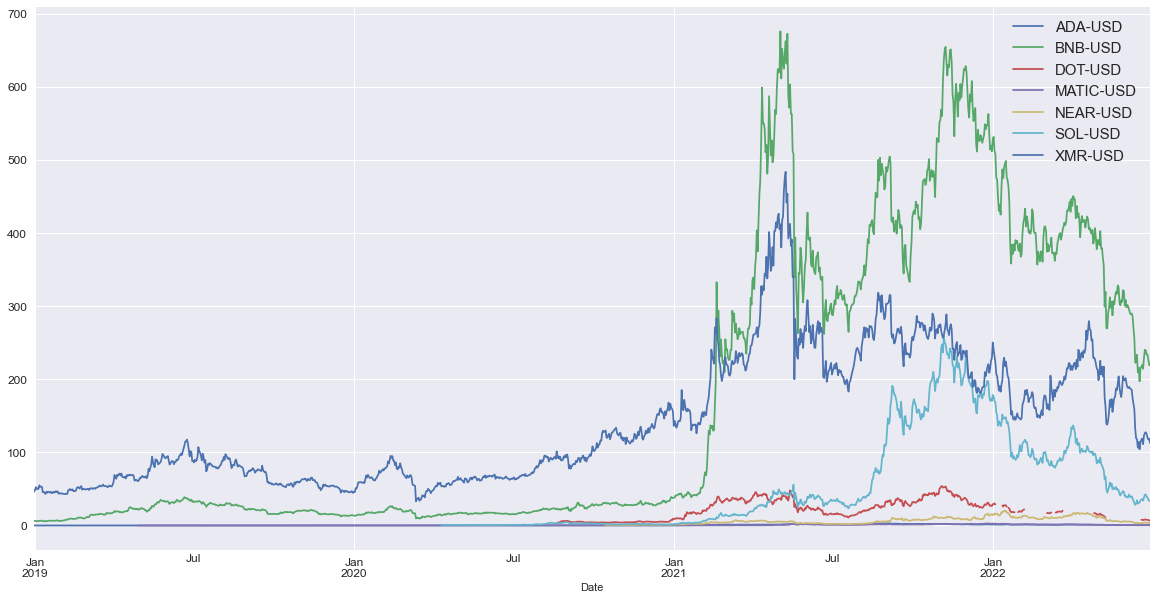

In [37]:
close.plot(figsize = (20,10), fontsize =12)
plt.legend(fontsize = 15)
plt.show()


In [40]:
# we need to define ret 
ret = close.pct_change().dropna()

In [41]:
import seaborn as sns

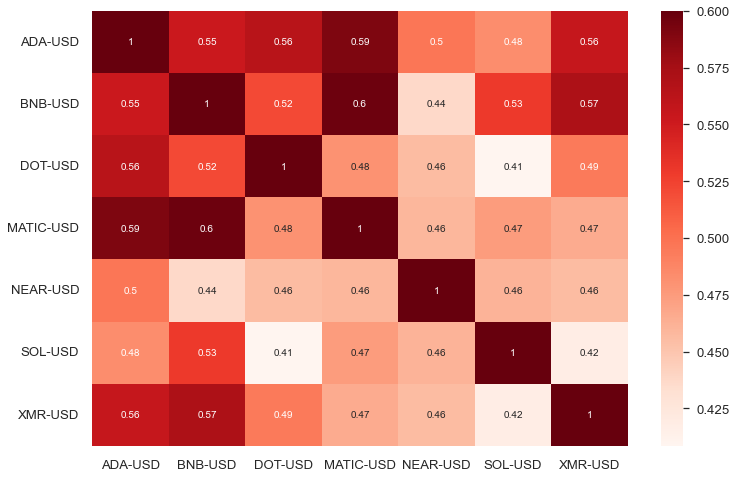

In [42]:
# not lets make a heatmap of the cryptos_data
plt.figure(figsize=(12,8))
sns.set(font_scale = 1.2)
sns.heatmap(ret.corr(), cmap = "Reds", annot = True, annot_kws = {"size":10}, vmax = 0.6)
plt.show()